In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
train_path = "../data/raw/train_FD001.txt"

df = pd.read_csv(
    train_path,
    sep=" ",
    header=None
)


df.drop(columns=[26, 27], inplace=True)


columns = (
    ["engine_id", "cycle", "op_setting1", "op_setting2", "op_setting3"] +
    [f"sensor{i}" for i in range(1, 22)]
)
df.columns = columns

df.head()


,engine_id,cycle,op_setting1,op_setting2,op_setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
print("Shape:", df.shape)
df.info()


Shape: (20631, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine_id    20631 non-null  int64  
 1   cycle        20631 non-null  int64  
 2   op_setting1  20631 non-null  float64
 3   op_setting2  20631 non-null  float64
 4   op_setting3  20631 non-null  float64
 5   sensor1      20631 non-null  float64
 6   sensor2      20631 non-null  float64
 7   sensor3      20631 non-null  float64
 8   sensor4      20631 non-null  float64
 9   sensor5      20631 non-null  float64
 10  sensor6      20631 non-null  float64
 11  sensor7      20631 non-null  float64
 12  sensor8      20631 non-null  float64
 13  sensor9      20631 non-null  float64
 14  sensor10     20631 non-null  float64
 15  sensor11     20631 non-null  float64
 16  sensor12     20631 non-null  float64
 17  sensor13     20631 non-null  float64
 18  sensor14     20631 non-null

In [4]:
df["engine_id"].nunique()


100

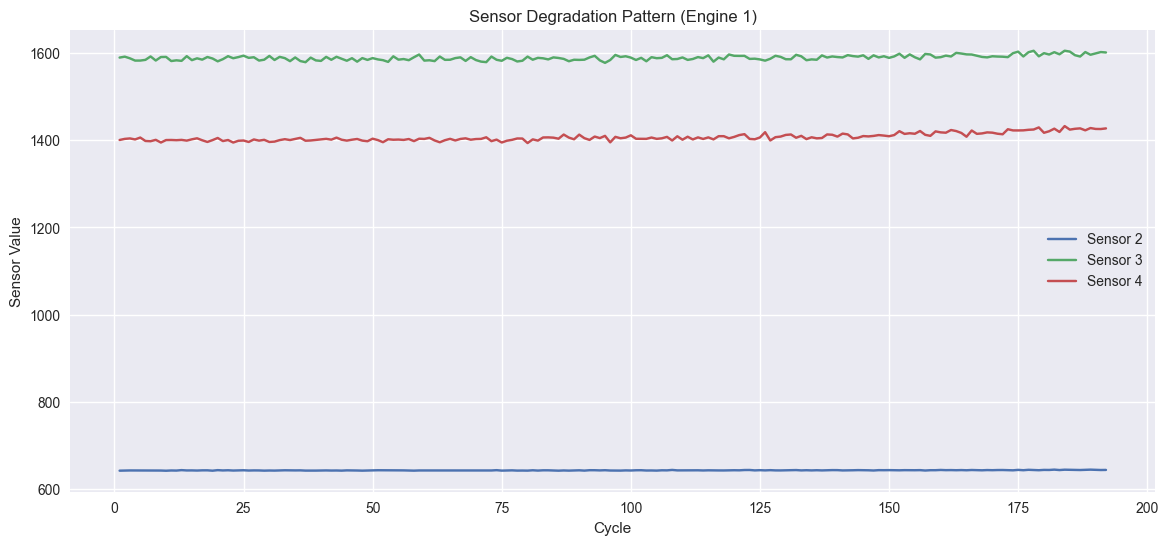

In [5]:
engine_1 = df[df["engine_id"] == 1]

plt.figure(figsize=(14, 6))
plt.plot(engine_1["cycle"], engine_1["sensor2"], label="Sensor 2")
plt.plot(engine_1["cycle"], engine_1["sensor3"], label="Sensor 3")
plt.plot(engine_1["cycle"], engine_1["sensor4"], label="Sensor 4")

plt.xlabel("Cycle")
plt.ylabel("Sensor Value")
plt.title("Sensor Degradation Pattern (Engine 1)")
plt.legend()
plt.show()


In [6]:
max_cycles = df.groupby("engine_id")["cycle"].max().reset_index()
max_cycles.columns = ["engine_id", "max_cycle"]


df = df.merge(max_cycles, on="engine_id", how="left")


df["RUL"] = df["max_cycle"] - df["cycle"]

df.drop(columns=["max_cycle"], inplace=True)

df.head()


,engine_id,cycle,op_setting1,op_setting2,op_setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


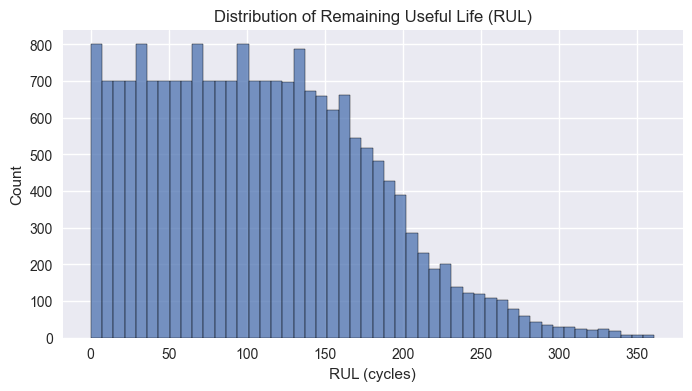

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(df["RUL"], bins=50)
plt.title("Distribution of Remaining Useful Life (RUL)")
plt.xlabel("RUL (cycles)")
plt.show()
